Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2024./2025.  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2025 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **20. listopada 2024. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline
#%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [3]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [6]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje
phi = PolynomialFeatures(1).fit_transform(X)
print(phi)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [7]:
from numpy import linalg
# Vaš kôd ovdje
#Dio po dio
transponiraniPhi = linalg.matrix_transpose(phi)
medjurezultat = linalg.matmul(transponiraniPhi, phi)
medjurezultat = linalg.inv(medjurezultat)
medjurezultat = linalg.matmul(medjurezultat, transponiraniPhi)
konacniRezultat = linalg.matmul(medjurezultat, y)

print(konacniRezultat)

#Odjednom
w = np.dot(linalg.pinv(phi), y)

print(w)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

Srednja kvadratna pogreška: 2.042857142857143


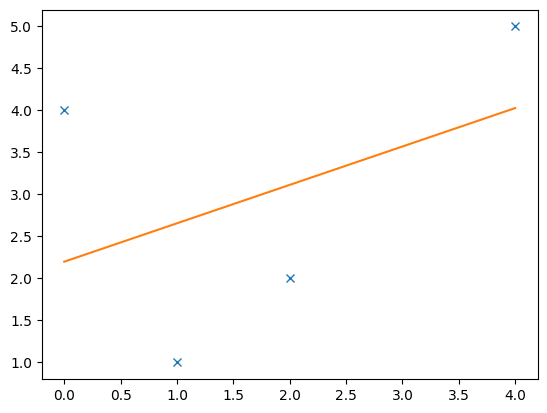

In [8]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
#Srednja kvadratna pogreška
h = np.dot(phi, np.transpose(w))
pogreska = mean_squared_error(y, h)
print("Srednja kvadratna pogreška: "+ str(pogreska))

plt.plot(X, y, 'x', #točke na grafu
         X, h)      #linija odstupanja

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [225]:
# Vaš kôd ovdje

print(np.dot(linalg.inv(phi), y))

#nije moguće

LinAlgError: Last 2 dimensions of the array must be square

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [9]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje
lienarnaRegresija = LinearRegression().fit(X,y)
print("Presret: " + str(lienarnaRegresija.intercept_))
print("Koeficijent: "+ str(lienarnaRegresija.coef_))

#Predikicija modela

print("Predikcije: " + str(lienarnaRegresija.predict(X)))

greskaModela = mean_squared_error(y, lienarnaRegresija.predict(X))
print("Greska modela: " + str(greskaModela))

if(greskaModela == pogreska):
    print("Greške su iste!")



Presret: 2.2
Koeficijent: [0.45714286]
Predikcije: [2.2        2.65714286 3.11428571 4.02857143]
Greska modela: 2.042857142857143
Greške su iste!


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [10]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    yi = f(X) + np.random.normal(0, noise, np.shape(X))

    return yi

In [11]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [12]:
# Vaš kôd ovdje
uniformnoDistribuiraniPrimjeri = make_instances(-5, 5, 50)

def f(x):
    return (5 + x - 2*(x**2) - 5*(x**3))

skupZaUčenje = make_labels(uniformnoDistribuiraniPrimjeri, f, 200)

#print(np.size(uniformnoDistribuiraniPrimjeri))
#print(np.size(skupZaUčenje))


Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

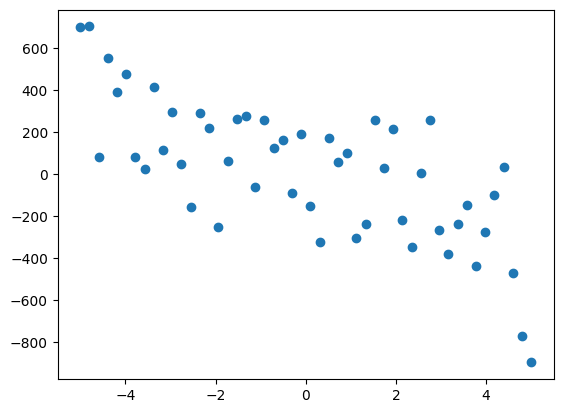

In [13]:
# Vaš kôd ovdje
plt.scatter(uniformnoDistribuiraniPrimjeri, skupZaUčenje)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

[[32.83096241]
 [-6.01816022]
 [-2.0078395 ]
 [-4.7402806 ]]
Srednja kvadratna pogreška: 41464.293980714356


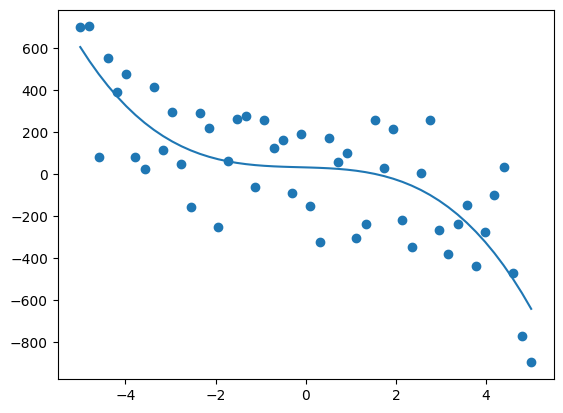

In [14]:
# Vaš kôd ovdje
phi = PolynomialFeatures(3).fit_transform(uniformnoDistribuiraniPrimjeri)

w = np.dot(linalg.pinv(phi), skupZaUčenje)
print(w)
h = np.dot(phi, w)
pogreska = mean_squared_error(skupZaUčenje, h)
print("Srednja kvadratna pogreška: "+ str(pogreska))

plt.scatter(uniformnoDistribuiraniPrimjeri, skupZaUčenje)
plt.plot(uniformnoDistribuiraniPrimjeri, h)



### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Srednja kvadratna pogreška stupnja 1 : 36298.417236147776
Srednja kvadratna pogreška stupnja 3 : 29563.37516883205
Srednja kvadratna pogreška stupnja 5 : 26320.605971509918
Srednja kvadratna pogreška stupnja 10 : 22668.49729177082
Srednja kvadratna pogreška stupnja 20 : 16748.754505334793


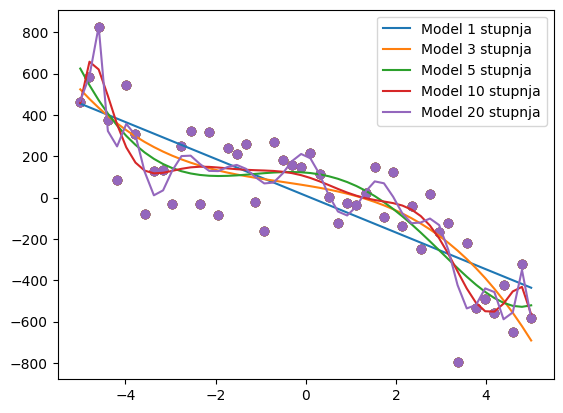

In [234]:
# Vaš kôd ovdje
stupnjevi = [1,3,5,10,20]
for stupanj in stupnjevi:
    phi = PolynomialFeatures(stupanj).fit_transform(uniformnoDistribuiraniPrimjeri)

    w = np.dot(linalg.pinv(phi), skupZaUčenje)
    #print(w)
    h = np.dot(phi, w)
    pogreska = mean_squared_error(skupZaUčenje, h)
    print("Srednja kvadratna pogreška stupnja "+ str(stupanj) + " : "+ str(pogreska))

    plt.scatter(uniformnoDistribuiraniPrimjeri, skupZaUčenje)
    plt.plot(uniformnoDistribuiraniPrimjeri, h, label='Model ' + str(stupanj) + ' stupnja')

plt.legend(loc = 'upper right')

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

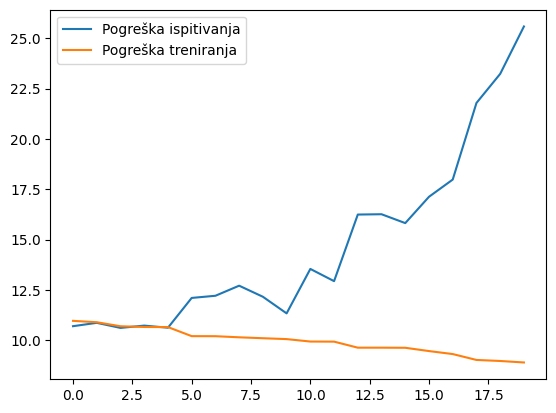

In [16]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(uniformnoDistribuiraniPrimjeri, skupZaUčenje, test_size=0.5) #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

pogreskaTreniranja = []
pogreskaTestiranja = []
iteracije = range(0, 20)

for i in range(1, 21):
    phiTren = PolynomialFeatures(i).fit_transform(X_train)
    phiTest = PolynomialFeatures(i).fit_transform(X_test)

    wTren = np.dot(linalg.pinv(phiTren), y_train)
    
    hTren = np.dot(phiTren, wTren)
    hTest = np.dot(phiTest, wTren)

    pogreskaTren = mean_squared_error(y_train, hTren)
    pogreskaTest = mean_squared_error(y_test, hTest)

    pogreskaTreniranja.append(np.log(pogreskaTren))
    pogreskaTestiranja.append(np.log(pogreskaTest))

plt.plot(iteracije, pogreskaTestiranja, iteracije, pogreskaTreniranja)
plt.legend(['Pogreška ispitivanja', 'Pogreška treniranja'], loc = 'upper left')

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

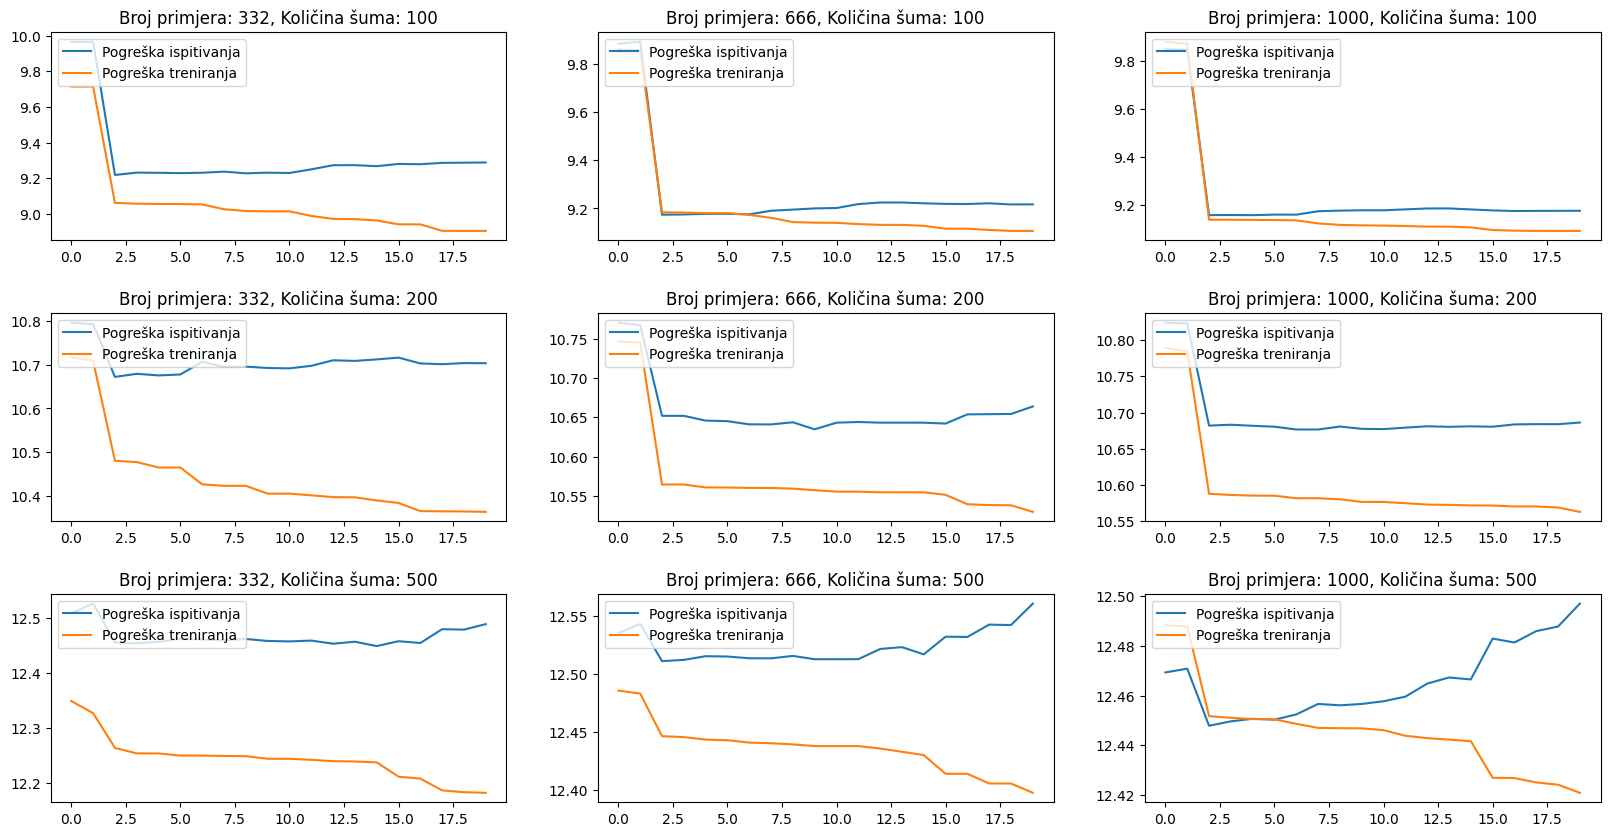

In [275]:
# Vaš kôd ovdje

sigma = [100, 200, 500]
brojN = [166*2, 333*2, 500*2]

milenijalniSkup = make_instances(-5, 5, 1000)                       #napravi 1000 primjera
X_train, X_test = train_test_split(milenijalniSkup, test_size=0.5)  #podijeli na 2 skupa, svaki po 500 primjera

tempXTrain = []
tempXTest = []
tempYTrain = []
tempYTest = []


for i in range(0, 3):
    y_train = make_labels(X_train, f, sigma[i])
    y_test = make_labels(X_test, f, sigma[i])

    for j in range(1, 4):
        tempXTrain.append(X_train[0:(int(size(X_train) * j/3))])
        tempXTest.append(X_test[0:int((size(X_train) * j/3))])
        tempYTrain.append(y_train[0:int((size(X_train) * j/3))])
        tempYTest.append(y_test[0:int((size(X_train) * j/3))])


pogreskaX = []
pogreskaY = []


for i in range(0, 9):

    tempPogreskaX = []
    tempPogreskaY = []


    for j in range(1, 21):
        phiTren = PolynomialFeatures(j).fit_transform(tempXTrain[i])
        phiTest = PolynomialFeatures(j).fit_transform(tempXTest[i])

        wTren = np.dot(linalg.pinv(phiTren), tempYTrain[i])
        
        hTren = np.dot(phiTren, wTren)
        hTest = np.dot(phiTest, wTren)

        pogreskaTren = mean_squared_error(tempYTrain[i], hTren)
        pogreskaTest = mean_squared_error(tempYTest[i], hTest)

        tempPogreskaX.append(np.log(pogreskaTren))
        tempPogreskaY.append(np.log(pogreskaTest))

    pogreskaX.append(tempPogreskaX)
    pogreskaY.append(tempPogreskaY)

iteracije = range(0, 20)
plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0.2, hspace = 0.35) 
sigmaNew = [100, 100, 100, 200, 200, 200, 500, 500, 500]


for i in range(0, 9):
    plt.subplot(3, 3, i + 1)
    plt.plot(iteracije, pogreskaY[i], iteracije, pogreskaX[i])
    plt.legend(['Pogreška ispitivanja', 'Pogreška treniranja'], loc = 'upper left')
    plt.title("Broj primjera: " + str(brojN[i%3]) + ", Količina šuma: " + str(sigmaNew[i]))



***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [376]:
# Vaš kôd ovdje

X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

myLambda = [0, 1, 10]
phi = PolynomialFeatures(3).fit_transform(X)

for i in range(0, 3):

    transponiraniPhi = np.transpose(phi)
    medjurezultat = np.dot(transponiraniPhi, phi)
    medjurezultat += np.dot(myLambda[i], np.identity(4))
    medjurezultat = linalg.inv(medjurezultat)
    medjurezultat = np.dot(medjurezultat, transponiraniPhi)
    konacniRezultat = np.dot(medjurezultat, y)

    print(konacniRezultat)

[ 4.         -5.91666667  3.375      -0.45833333]
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
[0.43312265 0.11060671 0.13827839 0.03093411]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [326]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

myLambda = [0, 1, 10]
phi = PolynomialFeatures(3).fit_transform(X)

for i in range(0, 3):
    regularizacija = Ridge(alpha = myLambda[i])
    regularizacija.fit(phi,y)
    print("Za Lambda = " + str(myLambda[i]) + ", koeficijent je: " + str(regularizacija.coef_) + ", a sjecište je: " + str(regularizacija.intercept_))


Za Lambda = 0, koeficijent je: [ 0.         -5.91666667  3.375      -0.45833333], a sjecište je: 4.000000000000025
Za Lambda = 1, koeficijent je: [ 0.         -0.69079365 -0.2831746   0.1445805 ], a sjecište je: 3.0569614512471652
Za Lambda = 10, koeficijent je: [ 0.         -0.15897295 -0.13423067  0.0815601 ], a sjecište je: 2.4944418431229725


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

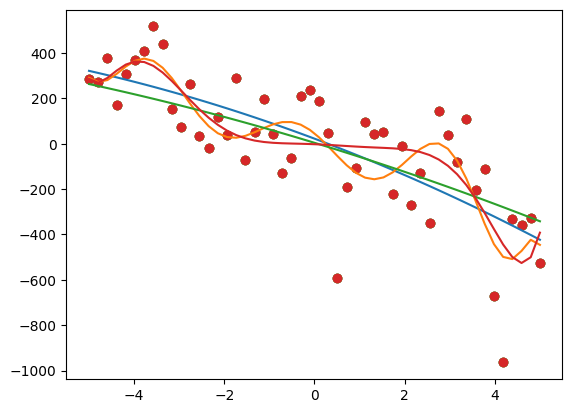

In [379]:
# Vaš kôd ovdje

from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    yi = f(X) + np.random.normal(0, noise, np.shape(X))

    return yi

def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

# Vaš kôd ovdje
uniformnoDistribuiraniPrimjeri = make_instances(-5, 5, 50)

def f(x):
    return (5 + x - 2*(x**2) - 5*(x**3))

skupZaUčenje = make_labels(uniformnoDistribuiraniPrimjeri, f, 200)


myLambda = [0, 100]
skupD = [2, 10]

for i in range(0, 2):
    for j in range(0, 2):

        phi = PolynomialFeatures(skupD[j]).fit_transform(uniformnoDistribuiraniPrimjeri)
        transponiraniPhi = np.transpose(phi)
        medjurezultat = np.dot(transponiraniPhi, phi)
        temp = skupD[j] + 1
        medjurezultat += np.dot(myLambda[i], np.identity(temp))
        medjurezultat = linalg.inv(medjurezultat)
        medjurezultat = np.dot(medjurezultat, transponiraniPhi)
        konacniRezultat = np.dot(medjurezultat, skupZaUčenje)
        
        plt.scatter(uniformnoDistribuiraniPrimjeri, skupZaUčenje)
        plt.plot(uniformnoDistribuiraniPrimjeri, np.dot(phi, konacniRezultat))


### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


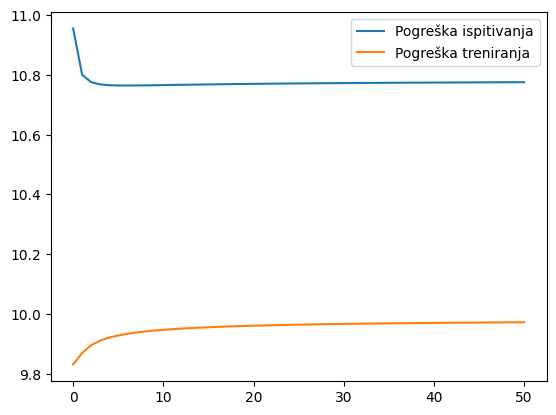

In [387]:
# Vaš kôd ovdje

X_train, X_test, y_train, y_test = train_test_split(uniformnoDistribuiraniPrimjeri, skupZaUčenje, test_size=0.5)

pogreskaTreniranja = []
pogreskaTestiranja = []
iteracije = range(0, 51)

for i in range(0, 51):
    phiTren = PolynomialFeatures(10).fit_transform(X_train)
    phiTest = PolynomialFeatures(10).fit_transform(X_test)

    transponiraniPhi = np.transpose(phiTren)
    medjurezultat = np.dot(transponiraniPhi, phiTren)
    medjurezultat += np.dot(i, np.identity(11))
    medjurezultat = linalg.inv(medjurezultat)
    medjurezultat = np.dot(medjurezultat, transponiraniPhi)
    konacniRezultat = np.dot(medjurezultat, y_train)
    
    
    hTren = np.dot(phiTren, konacniRezultat)
    hTest = np.dot(phiTest, konacniRezultat)

    pogreskaTren = mean_squared_error(y_train, hTren)
    pogreskaTest = mean_squared_error(y_test, hTest)

    pogreskaTreniranja.append(np.log(pogreskaTren))
    pogreskaTestiranja.append(np.log(pogreskaTest))

plt.plot(iteracije, pogreskaTestiranja, iteracije, pogreskaTreniranja)
plt.legend(['Pogreška ispitivanja', 'Pogreška treniranja'])

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [1]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

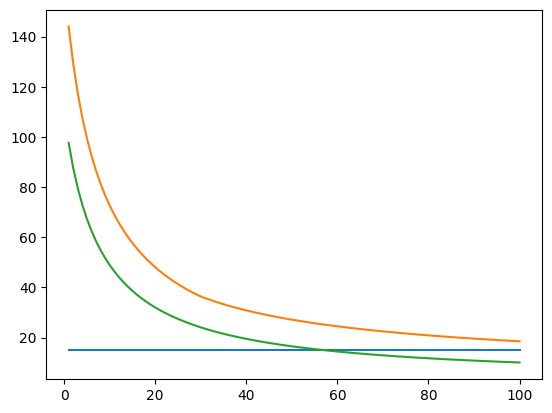

In [41]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

X_train, X_test, y_train, y_test = train_test_split(uniformnoDistribuiraniPrimjeri, skupZaUčenje, test_size=0.5) #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
phi = PolynomialFeatures(5).fit_transform(X_train)

l0 = []
l1 = []
l2 = []

myLambda = range(1, 101)

for i in myLambda:
    transponiraniPhi = np.transpose(phi)
    medjurezultat = np.dot(transponiraniPhi, phi)
    medjurezultat += np.dot(i, np.identity(6))
    medjurezultat = linalg.inv(medjurezultat)
    medjurezultat = np.dot(medjurezultat, transponiraniPhi)
    konacniRezultat = np.dot(medjurezultat, y_train)

    l0.append(sum(np.nonzero(konacniRezultat)))
    l1.append(sum(abs(konacniRezultat)))
    temp = np.sqrt(np.dot(np.transpose(konacniRezultat), konacniRezultat))
    l2.append(temp[0])

plt.plot(myLambda, l0, myLambda, l1, myLambda, l2)



### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

c:\Users\MPB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.030e+04, tolerance: 3.242e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\MPB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.326e+04, tolerance: 3.242e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\MPB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of 

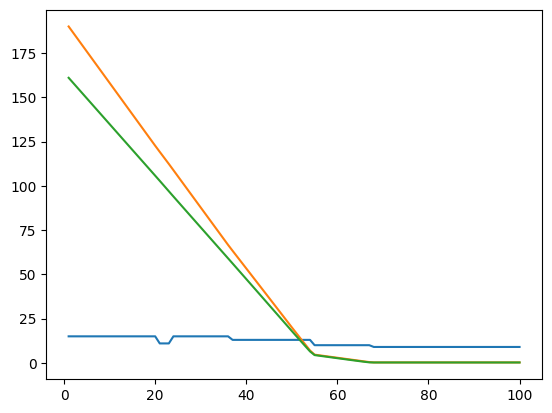

In [44]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

X_train, X_test, y_train, y_test = train_test_split(uniformnoDistribuiraniPrimjeri, skupZaUčenje, test_size=0.5) #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
phi = PolynomialFeatures(5).fit_transform(X_train)

l0 = []
l1 = []
l2 = []

myLambda = range(1, 101)

for i in myLambda:
    konacniRezultat = Lasso(alpha= i)
    konacniRezultat.fit(phi, y_train)
    konacniRezultat = konacniRezultat.coef_

    l0.append(sum(np.nonzero(konacniRezultat)))
    l1.append(sum(abs(konacniRezultat)))
    temp = np.sqrt(np.dot(np.transpose(konacniRezultat), konacniRezultat))
    l2.append(temp)

plt.plot(myLambda, l0, myLambda, l1, myLambda, l2)

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [51]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

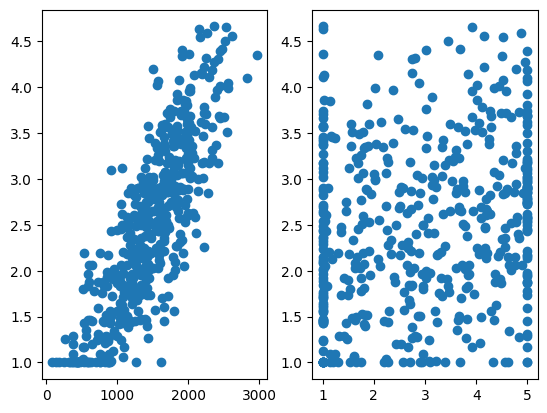

In [83]:
# Vaš kôd ovdje

plt.subplot(1,2,1)

plt.scatter(exam_score, grades_y)

    
plt.subplot(1,2,2)
plt.scatter(grade_in_highschool, grades_y)

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [55]:
# Vaš kôd ovdje

model = Ridge(alpha=0.01)
model.fit(grades_X, grades_y)

Ridge(alpha=0.01)

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [71]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje

scaler = StandardScaler()

grades_X_fixed = scaler.fit_transform(grades_X)
grades_y_fixed = grades_y.reshape(-1, 1)

model = Ridge(alpha=0.01)
model.fit(grades_X_fixed, grades_y_fixed)

Ridge(alpha=0.01)

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [ ]:
# Vaš kôd ovdje

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [ ]:
# Vaš kôd ovdje

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [ ]:
# Vaš kôd ovdje

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.